## EX7.3 in Chapra book

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# lake parameter
Q = 1e5  # m^3/yr
V = 1e6  # m^3
z = 5    # m
k = 0.2  # 1/yr
v = 0.25 # m/yr
W = 50e6 # step loading, g/yr
c0 = 15  # initial concentration, mg/L

In [3]:
lamb = Q/V + k + v/z

In [4]:
def well_mixed_lake(c):
    f = W/V - lamb * c
    return f

def Euler(ci, h):
    c = ci + well_mixed_lake(ci) * h
    return c

def Heun(ci, h):
    c_pred = Euler(ci, h)
    slope = 0.5 * (well_mixed_lake(ci)+well_mixed_lake(c_pred))
    c = ci + slope * h
    return c
    
def fourth_RK(ci, h):
    k1 = well_mixed_lake(ci)
    k2 = well_mixed_lake(ci+0.5*h*k1)
    k3 = well_mixed_lake(ci+0.5*h*k2)
    k4 = well_mixed_lake(ci+h*k3)
    slope = (k1+2*k2+2*k3+k4)/6
    c = ci + slope * h
    return c

In [6]:
dt = 2 # time step, yr
t = np.arange(0,21,dt) # define the time
c_Euler = np.zeros(len(t))  # allocate concentration 
c_Heun = np.zeros(len(t))   # allocate concentration 
c_RK = np.zeros(len(t))   # allocate concentration 
c_Euler[0] = c0             # assign the initial concentratioin to the first value
c_Heun[0] = c0
c_RK[0] = c0

# update c from the second value
for count, ti in enumerate(t[1:]):
    c_Euler[count+1] = Euler(c_Euler[count], dt)
    c_Heun[count+1] = Heun(c_Heun[count], dt)
    c_RK[count+1] = fourth_RK(c_RK[count], dt)
    
c_analytical = c0*np.exp(-lamb*t) + W/(lamb*V)*(1-np.exp(-lamb*t))    

Text(0, 0.5, 'c (g/L)')

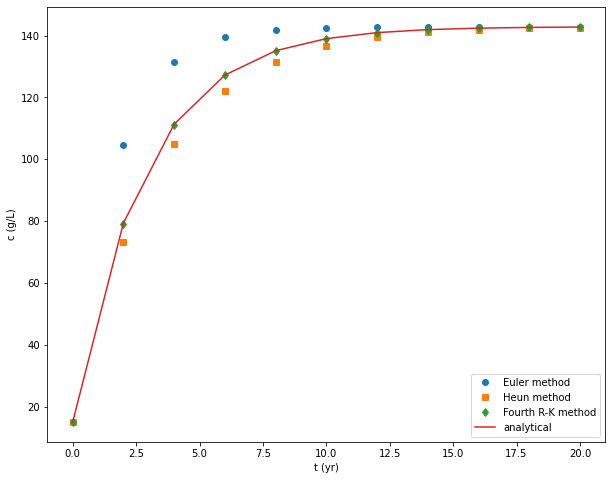

In [9]:
plt.figure(figsize=(10,8))
plt.plot(t,c_Euler,'o',label='Euler method')
plt.plot(t,c_Heun,'s',label='Heun method')
plt.plot(t,c_RK,'d',label='Fourth R-K method')

plt.plot(t,c_analytical, label='analytical')
plt.legend()
plt.xlabel('t (yr)')
plt.ylabel('c (g/L)')